# Old Faithful Dataset

## Read in the data

In [1]:
# Imports and preliminaries
import numpy as np
import matplotlib.pyplot as pl
# https://stackoverflow.com/questions/3518778/how-to-read-csv-into-record-array-in-numpy

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

In [9]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html
eruptions = np.genfromtxt('old-faithful.csv', delimiter=',', skip_header=1, usecols=(1))
waiting = np.genfromtxt('old-faithful.csv', delimiter=',', skip_header=1, usecols=(2))

#could be used to filter nan
#old_faithful = old_faithful[np.logical_not(np.isnan(old_faithful))]

eruptions


array([ 3.6  ,  1.8  ,  3.333,  2.283,  4.533,  2.883,  4.7  ,  3.6  ,
        1.95 ,  4.35 ,  1.833,  3.917,  4.2  ,  1.75 ,  4.7  ,  2.167,
        1.75 ,  4.8  ,  1.6  ,  4.25 ,  1.8  ,  1.75 ,  3.45 ,  3.067,
        4.533,  3.6  ,  1.967,  4.083,  3.85 ,  4.433,  4.3  ,  4.467,
        3.367,  4.033,  3.833,  2.017,  1.867,  4.833,  1.833,  4.783,
        4.35 ,  1.883,  4.567,  1.75 ,  4.533,  3.317,  3.833,  2.1  ,
        4.633,  2.   ,  4.8  ,  4.716,  1.833,  4.833,  1.733,  4.883,
        3.717,  1.667,  4.567,  4.317,  2.233,  4.5  ,  1.75 ,  4.8  ,
        1.817,  4.4  ,  4.167,  4.7  ,  2.067,  4.7  ,  4.033,  1.967,
        4.5  ,  4.   ,  1.983,  5.067,  2.017,  4.567,  3.883,  3.6  ,
        4.133,  4.333,  4.1  ,  2.633,  4.067,  4.933,  3.95 ,  4.517,
        2.167,  4.   ,  2.2  ,  4.333,  1.867,  4.817,  1.833,  4.3  ,
        4.667,  3.75 ,  1.867,  4.9  ,  2.483,  4.367,  2.1  ,  4.5  ,
        4.05 ,  1.867,  4.7  ,  1.783,  4.85 ,  3.683,  4.733,  2.3  ,
      

In [10]:
waiting

array([ 79.,  54.,  74.,  62.,  85.,  55.,  88.,  85.,  51.,  85.,  54.,
        84.,  78.,  47.,  83.,  52.,  62.,  84.,  52.,  79.,  51.,  47.,
        78.,  69.,  74.,  83.,  55.,  76.,  78.,  79.,  73.,  77.,  66.,
        80.,  74.,  52.,  48.,  80.,  59.,  90.,  80.,  58.,  84.,  58.,
        73.,  83.,  64.,  53.,  82.,  59.,  75.,  90.,  54.,  80.,  54.,
        83.,  71.,  64.,  77.,  81.,  59.,  84.,  48.,  82.,  60.,  92.,
        78.,  78.,  65.,  73.,  82.,  56.,  79.,  71.,  62.,  76.,  60.,
        78.,  76.,  83.,  75.,  82.,  70.,  65.,  73.,  88.,  76.,  80.,
        48.,  86.,  60.,  90.,  50.,  78.,  63.,  72.,  84.,  75.,  51.,
        82.,  62.,  88.,  49.,  83.,  81.,  47.,  84.,  52.,  86.,  81.,
        75.,  59.,  89.,  79.,  59.,  81.,  50.,  85.,  59.,  87.,  53.,
        69.,  77.,  56.,  88.,  81.,  45.,  82.,  55.,  90.,  45.,  83.,
        56.,  89.,  46.,  82.,  51.,  86.,  53.,  79.,  81.,  60.,  82.,
        77.,  76.,  59.,  80.,  49.,  96.,  53.,  7

## Investigate the data

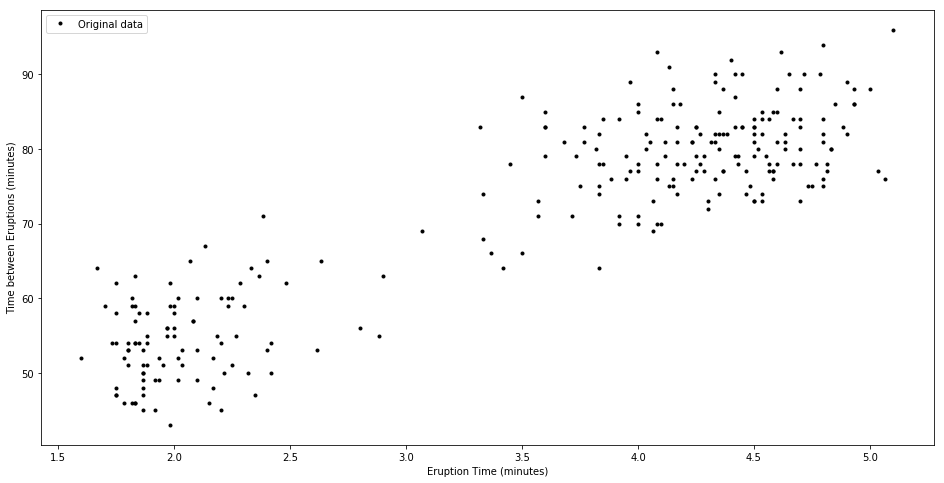

In [13]:
pl.plot(eruptions, waiting, 'k.', label='Original data')
pl.xlabel('Eruption Time (minutes)')
pl.ylabel('Time between Eruptions (minutes)')
pl.legend()
pl.show()

## Finding the best fit line

### Find the best fit line using np.polyfit()

In [28]:
# Find best fit line
m, c = np.polyfit(eruptions, waiting, 1)
print("Best fit is m = %f and c = %f" % (m, c))

Best fit is m = 10.729641 and c = 33.474397


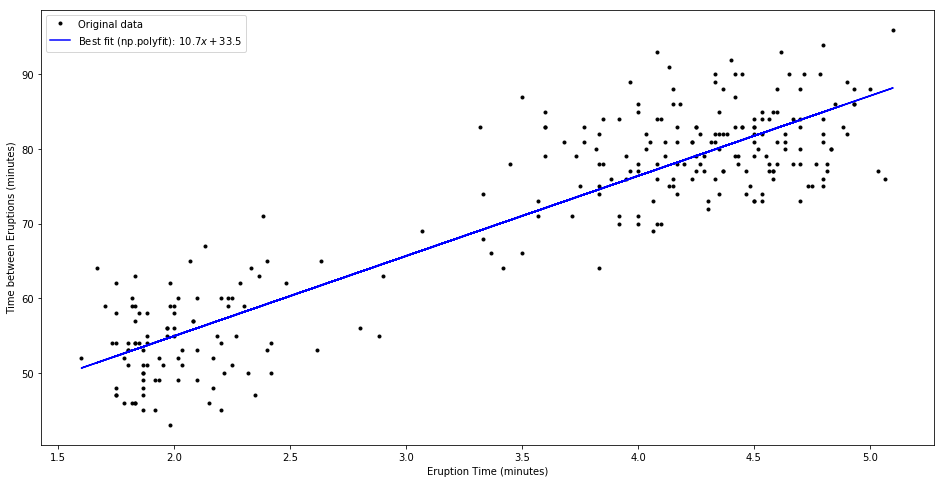

In [29]:
pl.plot(eruptions, waiting, 'k.', label='Original data')
pl.plot(eruptions, m * eruptions + c, 'b-', label='Best fit (np.polyfit): $%0.1f x + %0.1f$' % (m,c))
pl.xlabel('Eruption Time (minutes)')
pl.ylabel('Time between Eruptions (minutes)')
pl.legend()
pl.show()

### Find best fit line using Gradient Descent

In [30]:
# Gradient Descent

def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

In [19]:
eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(eruptions, waiting, m, c)
  cnew = c - eta * grad_c(eruptions, waiting, m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    print("m: %20.16f  c: %20.16f" % (m, c))

m:  14.2871798049999992  c:   4.6126646000000004
m:  17.1578598202160002  c:   5.5077518705864037
m:  17.7563279839381316  c:   5.8094767726938921
m:  17.8592518370987179  c:   5.9812372436956496
m:  17.8542089448928891  c:   6.1241256466259459
m:  17.8257482960753535  c:   6.2601977356066643
m:  17.7923135038024007  c:   6.3942674955344865
m:  17.7579273633556944  c:   6.5273876242080604
m:  17.7234667863600066  c:   6.6597902859939042
m:  17.6891224163157688  c:   6.7915286343391053
m:  17.6549351912353991  c:   6.9226167593224188
m:  17.6209133942264486  c:   7.0530602171321544
m:  17.5870581879427803  c:   7.1828626901012518
m:  17.5533691848837456  c:   7.3120274396471450
m:  17.5198456625338004  c:   7.4405576232887487
m:  17.4864868284285180  c:   7.5684563638627251
m:  17.4532918779630535  c:   7.6957267646819769
m:  17.4202600069877143  c:   7.8223719129012066
m:  17.3873904145403912  c:   7.9483948803095643
m:  17.3546823034274809  c:   8.0737987235617368
m:  17.3221348803355

m:  10.8418992184969341  c:  33.0439972838437654
m:  10.8413477195819752  c:  33.0461117466214631
m:  10.8407989300644019  c:  33.0482158214912829
m:  10.8402528366335194  c:  33.0503095594868128
m:  10.8397094260440259  c:  33.0523930113909330
m:  10.8391686851156877  c:  33.0544662277370307
m:  10.8386306007330262  c:  33.0565292588102366
m:  10.8380951598449933  c:  33.0585821546486400
m:  10.8375623494646600  c:  33.0606249650445037
m:  10.8370321566689007  c:  33.0626577395454646
m:  10.8365045685980750  c:  33.0646805274557565
m:  10.8359795724557220  c:  33.0666933778373817
m:  10.8354571555082444  c:  33.0686963395113125
m:  10.8349373050846065  c:  33.0706894610586772
m:  10.8344200085760178  c:  33.0726727908219331
m:  10.8339052534356366  c:  33.0746463769060455
m:  10.8333930271782570  c:  33.0766102671796460
m:  10.8328833173800128  c:  33.0785645092761982
m:  10.8323761116780748  c:  33.0805091505951481
m:  10.8318713977703460  c:  33.0824442383030899
m:  10.8313691634151

m:  10.7302756736519793  c:  33.4719651805836165
m:  10.7302725575759297  c:  33.4719771277092377
m:  10.7302694568085020  c:  33.4719890161411655
m:  10.7302663712744888  c:  33.4720008461677452
m:  10.7302633008990487  c:  33.4720126180759081
m:  10.7302602456077150  c:  33.4720243321511788
m:  10.7302572053263798  c:  33.4720359886776748
m:  10.7302541799813032  c:  33.4720475879381283
m:  10.7302511694991072  c:  33.4720591302138715
m:  10.7302481738067712  c:  33.4720706157848582
m:  10.7302451928316387  c:  33.4720820449296639
m:  10.7302422265014048  c:  33.4720934179254996
m:  10.7302392747441253  c:  33.4721047350482195
m:  10.7302363374882024  c:  33.4721159965723132
m:  10.7302334146623952  c:  33.4721272027709205
m:  10.7302305061958130  c:  33.4721383539158452
m:  10.7302276120179112  c:  33.4721494502775556
m:  10.7302247320584936  c:  33.4721604921251910
m:  10.7302218662477067  c:  33.4721714797265690
m:  10.7302190145160417  c:  33.4721824133481860
m:  10.7302161767943

m:  10.7296500487657873  c:  33.4743638444771818
m:  10.7296500062523243  c:  33.4743640074750246
m:  10.7296499639477219  c:  33.4743641696720928
m:  10.7296499218509531  c:  33.4743643310723229
m:  10.7296498799609967  c:  33.4743644916796299
m:  10.7296498382768348  c:  33.4743646514979076
m:  10.7296497967974602  c:  33.4743648105310285
m:  10.7296497555218640  c:  33.4743649687828579
m:  10.7296497144490459  c:  33.4743651262572257
m:  10.7296496735780114  c:  33.4743652829579545
m:  10.7296496329077673  c:  33.4743654388888459
m:  10.7296495924373279  c:  33.4743655940536868
m:  10.7296495521657089  c:  33.4743657484562362
m:  10.7296495120919371  c:  33.4743659021002387
m:  10.7296494722150388  c:  33.4743660549894173
m:  10.7296494325340461  c:  33.4743662071274812
m:  10.7296493930479997  c:  33.4743663585181253
m:  10.7296493537559403  c:  33.4743665091650229
m:  10.7296493146569123  c:  33.4743666590718192
m:  10.7296492757499724  c:  33.4743668082421593
m:  10.7296492370341

m:  10.7296413954398933  c:  33.4743970215787314
m:  10.7296413954383887  c:  33.4743970215845010
m:  10.7296413954368912  c:  33.4743970215902422
m:  10.7296413954354009  c:  33.4743970215959550
m:  10.7296413954339176  c:  33.4743970216016393
m:  10.7296413954324414  c:  33.4743970216072952
m:  10.7296413954309742  c:  33.4743970216129227
m:  10.7296413954295140  c:  33.4743970216185289
m:  10.7296413954280592  c:  33.4743970216241067
m:  10.7296413954266114  c:  33.4743970216296560
m:  10.7296413954251708  c:  33.4743970216351769
m:  10.7296413954237373  c:  33.4743970216406694
m:  10.7296413954223127  c:  33.4743970216461335
m:  10.7296413954208951  c:  33.4743970216515763
m:  10.7296413954194829  c:  33.4743970216569906
m:  10.7296413954180760  c:  33.4743970216623765
m:  10.7296413954166781  c:  33.4743970216677340
m:  10.7296413954152872  c:  33.4743970216730702
m:  10.7296413954139034  c:  33.4743970216783779
m:  10.7296413954125249  c:  33.4743970216836573
m:  10.7296413954111

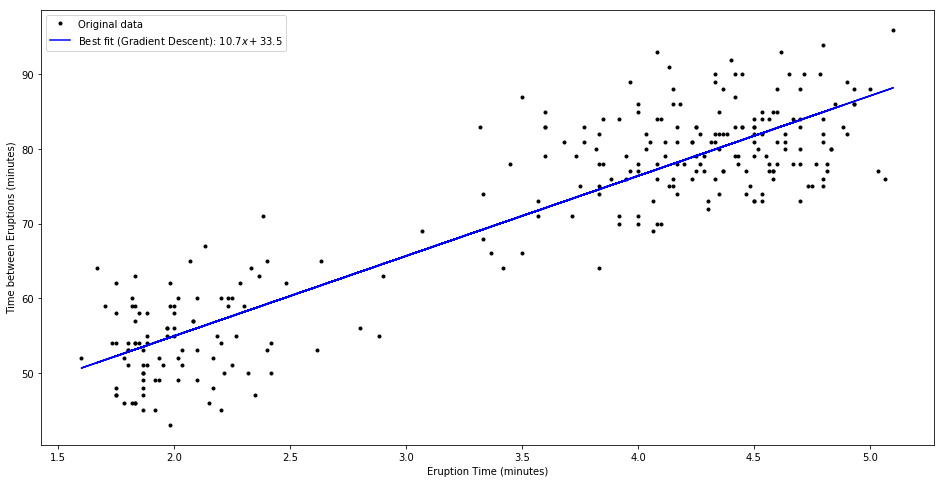

In [26]:
pl.plot(eruptions, waiting, 'k.', label='Original data')
#pl.plot(m, 'b-', label='Slope: %f' % c)
pl.plot(eruptions, m * eruptions + c, 'b-', label='Best fit (Gradient Descent): $%0.1f x + %0.1f$' % (m,c))
pl.xlabel('Eruption Time (minutes)')
pl.ylabel('Time between Eruptions (minutes)')
pl.legend()
pl.show()